# TO DO

---

Save the output images into a pdf. 

---

Clean, comment, ...

### Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import os
import csv
import time
import ast
import sys
plt.style.use('seaborn-notebook')
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_rows', 200)

### Read in cmd line args

In [44]:
#sh macro_hbond.sh /Users/NikosMynhier/Desktop/David/Alpha_Psi_Calculation/fixed_pdbs_h 8 /Users/NikosMynhier/Desktop/code/2021/AB-Fibril-Radius-vs-Hydrogen-Bond-Relationship /Users/NikosMynhier/Desktop/David/plots /Users/NikosMynhier/Desktop/David/interstrand_radius /Users/NikosMynhier/Desktop/David/helical_parameters.txt 

args = sys.argv
#args: script name, /path/to/file.pdb, /path/to/uncert_file.pdb
args = ["script name", "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/calculations/hbonds/6lni_refined/6lni.datatable.csv", "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/calculations/hbonds/6lni_refined/6lni.hbonds.csv", "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/calculations/interstrand_tilt_radius/data/6lni_origin_5layers_rad_dist.csv", "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/width_pitch/helical_parameters.txt", "/Users/davidboyer/Dropbox/Tau_Project_EISENBERG_LAB/amyloid_width/python/calculations/hbonds/data3/"]
#"5w7v_3layers_neg120p44_h.pdb" #'6ufr_origin_5layers_h.pdb'


In [45]:
sample_name1 = args[1].split("/")[-1][0:4]
sample_name2 = args[2].split("/")[-1][0:4]
path = args[1][0:len(args[1])-len(args[1].split("/")[-1])]
outdir = args[5]

In [46]:
filename = args[1]
filename2 = args[2]

df = pd.read_csv(filename)
h_bonds = pd.read_csv(filename2)

### Plotting

In [47]:
colors = []
colors_onlyBB = []
radius_onlyBB = []
dist_onlyBB = []
tilt_onlyBB = []
uncert_onlyBB = []
for i in range(len(h_bonds.iloc[:,1])):
    if h_bonds['H & O Strucs'][i] == "[['B-Strand'], ['B-Strand']]":
        colors.append('red')
        colors_onlyBB.append('red')
        radius_onlyBB.append(h_bonds['radius'][i])
        dist_onlyBB.append(h_bonds['dist'][i])
        tilt_onlyBB.append(h_bonds['tilt'][i])
        uncert_onlyBB.append(h_bonds['Uncertainty'][i])
    else:
        colors.append('blue')

---
Raw Plots

---

In [48]:
filenames = args[3]
filenames_helical = args[4]

dataframe = pd.read_csv(filenames, delimiter=',', skipinitialspace=True, header=None)
dataframe_tilt = h_bonds["tilt"]
helix = pd.read_csv(filenames_helical, delimiter='\t', skipinitialspace=True, header=None)

In [49]:
def get_radius(dataframe):
    return dataframe[:][0]

def get_interstrand(dataframe):
    return dataframe[:][1]

#def get_tilt(filename):
#    return dataframe_tilt[1]

def pred_interstrand(x, y, r):
    return np.sqrt( (2*(r**2)) * (1-np.cos(x*np.pi/180)) + (y**2))

#def pred_tilt(x, y, r):
#    return (180/np.pi)*np.arccos(((np.abs(y))/np.sqrt( (2*(r**2)) * (1-np.cos(x*np.pi/180)) + (y**2))))

Theo_interstrands = []
name = dataframe[7][0]
for k in range(len(helix[0])):
    if helix[0][k] == name:
        x = helix[1][k]
        y = helix[2][k]
for j in range(len(dataframe)):
    Theo_interstrands.append( pred_interstrand(x, y, get_radius(dataframe)[j] ))
    
#Theo_tilt = []
#name = dataframe[5][0]
#for k in range(len(helix[0])):
#    if helix[0][k] == name:
#        x = helix[1][k]
#        y = helix[2][k]
#for j in range(len(dataframe_tilt)):
#    Theo_tilt.append( pred_tilt(x, y, dataframe_tilt[j]) )

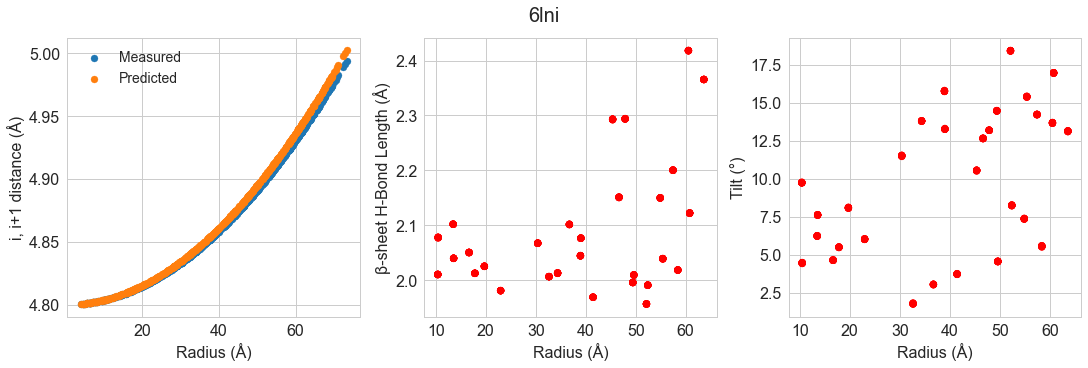

In [54]:
figsize = (15,5)
columns = 3
rows = 1

fig, ax = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
fig.suptitle(sample_name1, fontsize=20)


#Plot Radius vs Interstrand Distance
Measured = ax[0].scatter(dataframe[:][0], get_interstrand(dataframe))
Predicted = ax[0].scatter(dataframe[:][0], Theo_interstrands)

#ax[0].legend(['Orange = Predicted, Blue = Measured'], loc='upper left', scatterpoints=None)
ax[0].legend((Measured,Predicted),['Measured','Predicted'],fontsize=14)
name = dataframe[7][0]
#ax[0].set_title(sample_name1, fontsize=13)
ax[0].set_xlabel("Radius (Å)", fontsize=16)
ax[0].set_ylabel("i, i+1 distance (Å)", fontsize=16)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)

#Plot all Radius vs Distance
#ax[0].scatter(h_bonds['radius'], h_bonds['dist'], c=colors)
ax[1].scatter(radius_onlyBB, dist_onlyBB, c=colors_onlyBB)
#ax[1].legend(['Red = Beta-Beta'], frameon=False, loc='upper left') #, Blue = else'
#ax[1].set_title(sample_name1, fontsize=10)
ax[1].set_xlabel("Radius (Å)", fontsize=16)
ax[1].set_ylabel("β-sheet H-Bond Length (Å)", fontsize=16)
ax[1].tick_params(axis='x', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)

#Plot all Radius vs Tilt
#ax[1].scatter(h_bonds['radius'], h_bonds['tilt'], c=colors)
ax[2].scatter(radius_onlyBB, tilt_onlyBB, c=colors_onlyBB)
#ax[2].legend(['Red = Beta-Beta'], frameon=False, loc='upper right') #, Blue = else'
#ax[2].set_title(sample_name1, fontsize=10)
ax[2].set_xlabel("Radius (Å)", fontsize=16)
ax[2].set_ylabel("Tilt (°)", fontsize=16)
ax[2].tick_params(axis='x', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)


plt.savefig(f"{outdir}/{sample_name1}.all_plots.pdf")
#plt.show() 

---
---
---
---
---
---
---

---
Plots with fits

---

In [51]:
#figsize = (15,5)
#columns = 2
#rows = 1
#
#fig, ax = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
#fig.suptitle("All Relationships & Fits")
#
##Plot Beta-Beta radius vs. dsitance w/ quadratic fit 
#[a, b, c] = np.polyfit(radius_onlyBB, dist_onlyBB, 2)
#x2d = np.linspace(0,50,100)
#y2d = a*(x2d**2) + b*x2d + c
#
#[a, b] = np.polyfit(radius_onlyBB, dist_onlyBB, 1)
#x1d = np.linspace(0,50,100)
#y1d = a*x1d + b
#
#ax[0].scatter(radius_onlyBB, dist_onlyBB, c=colors_onlyBB)
#ax[0].plot(x2d, y2d)
#ax[0].set_title(f'{filename} only Beta-Beta', fontsize=15)
#ax[0].set_xlabel("Radius", fontsize=15)
#ax[0].set_ylabel("Dist", fontsize=15)
#
##Plot Beta-Beta Radius vs Tilt w/ linear fit
#[a, b, c] = np.polyfit(radius_onlyBB, tilt_onlyBB, 2)
#x2d = np.linspace(0,50,100)
#y2d = a*(x2d**2) + b*x2d + c
#
#[a, b] = np.polyfit(radius_onlyBB, tilt_onlyBB, 1)
#x1d = np.linspace(0,50,100)
#y1d = a*x1d + b
#
#ax[1].scatter(radius_onlyBB, tilt_onlyBB, c=colors_onlyBB)
#ax[1].plot(x1d, y1d)
#ax[1].set_title(f'{filename} only Beta-Beta', fontsize=15)
#ax[1].set_xlabel("Radius", fontsize=15)
#ax[1].set_ylabel("Tilt", fontsize=15)
#
#plt.show() 

---
Fitting with Uncertainty

---

In [52]:
## Weighting linearly or with uncertainty
#
##Linear Weighting
#def linear_weight(radius):
#    return (1-(1/radius))
#
#dist_err = []
#for rad in radius_onlyBB:
#    dist_err.append(.0005*linear_weight(rad))
##derr = np.array(radius_onlyBB)*np.array(dist_err)
#
##Uncertainty
#derr = uncert_onlyBB

In [53]:
#def curve(x, a, b, c):
#    return a*(x**2) + b*x + c
#
#x = radius_onlyBB
#y = dist_onlyBB
#plt.errorbar(x, y, yerr=derr, fmt=".", label="Data")
#popt, pcov = sp.curve_fit(curve, x, y, sigma=derr)
#
#print("a =", popt[0], "+/-", pcov[0,0]**0.5)
#print("b =", popt[1], "+/-", pcov[1,1]**0.5)
#print("c =", popt[2], "+/-", pcov[2,2]**0.5)
#print('Weighted fit parameters:', popt)
#print('Covariance matrix:'); print(pcov)
#
#rangerad = np.linspace(0, 50)
#plt.plot(curve(rangerad, popt[0], popt[1], popt[2]), label="Fit")
#
#
##Graphics
#plt.title("Radius vs. H-bond Distance")
#plt.xlabel("Radius (angstroms)")
#plt.ylabel("H-bond Distance (angstroms)")
#plt.legend(loc='upper right')
##plt.savefig('/Users/NikosMynhier/Desktop/X_vs_lnI_Graph')
#plt.show()